In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_crime_dataset_1.csv')

In [3]:
df

,crimedate,crimetime,crimecode,location,description,inside/outside,weapon,post,district,neighborhood,location_1,total_incidents
0,2016-11-12,1900-01-01 02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,Unknown,111,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,2016-11-12,1900-01-01 02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,2016-11-12,1900-01-01 03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,Unknown,413,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,2016-11-12,1900-01-01 03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,Unknown,424,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,2016-11-12,1900-01-01 03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,Unknown,111,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
279931,2011-01-01,1900-01-01 22:15:00,4D,6800 MCCLEAN BD,AGG. ASSAULT,I,HANDS,423,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1
279932,2011-01-01,1900-01-01 22:30:00,6J,3000 ODONNELL ST,LARCENY,I,Unknown,232,SOUTHEASTERN,Canton,"(39.2804600000, -76.5727300000)",1
279933,2011-01-01,1900-01-01 23:00:00,7A,2500 ARUNAH AV,AUTO THEFT,O,Unknown,721,WESTERN,Evergreen Lawn,"(39.2954200000, -76.6592800000)",1
279934,2011-01-01,1900-01-01 23:25:00,4E,100 N MONROE ST,COMMON ASSAULT,I,HANDS,714,WESTERN,Penrose/Fayette Street Outreach,"(39.2899900000, -76.6470700000)",1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279936 entries, 0 to 279935
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   crimedate        279936 non-null  object
 1   crimetime        279936 non-null  object
 2   crimecode        279936 non-null  object
 3   location         279936 non-null  object
 4   description      279936 non-null  object
 5   inside/outside   279936 non-null  object
 6   weapon           279936 non-null  object
 7   post             279936 non-null  int64 
 8   district         279936 non-null  object
 9   neighborhood     279936 non-null  object
 10  location_1       279936 non-null  object
 11  total_incidents  279936 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 25.6+ MB


In [5]:
df['Date']= pd.to_datetime(df['crimedate'])

In [6]:
df['Date']

0        2016-11-12
1        2016-11-12
2        2016-11-12
3        2016-11-12
4        2016-11-12
            ...    
279931   2011-01-01
279932   2011-01-01
279933   2011-01-01
279934   2011-01-01
279935   2011-01-01
Name: Date, Length: 279936, dtype: datetime64[ns]

In [7]:
df['Time'] = pd.to_datetime(df['crimetime'])
df['Time']

0        1900-01-01 02:35:00
1        1900-01-01 02:56:00
2        1900-01-01 03:00:00
3        1900-01-01 03:00:00
4        1900-01-01 03:00:00
                 ...        
279931   1900-01-01 22:15:00
279932   1900-01-01 22:30:00
279933   1900-01-01 23:00:00
279934   1900-01-01 23:25:00
279935   1900-01-01 23:38:00
Name: Time, Length: 279936, dtype: datetime64[ns]

In [8]:
df['Date'].value_counts()\
            .head(10)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues', subset='Count')

,index,Count
0,2015-04-27 00:00:00,412
1,2016-06-05 00:00:00,254
2,2011-10-14 00:00:00,191
3,2016-09-24 00:00:00,188
4,2016-10-19 00:00:00,188
5,2011-03-18 00:00:00,186
6,2013-12-20 00:00:00,186
7,2011-01-01 00:00:00,184
8,2016-06-20 00:00:00,183
9,2011-07-30 00:00:00,183


In [9]:
time = df['Date'].iloc[0]
time1 = df['Time'].iloc[0]
df['Hour'] = df['Time'].apply(lambda time1: time1.hour)
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Year'] = df['Date'].apply(lambda time: time.year)
df['Day of Week'] = df['Date'].apply(lambda time: time.dayofweek)

In [10]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Day of Week'].map(dmap)

# Visualizations

## Temporal analysis

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

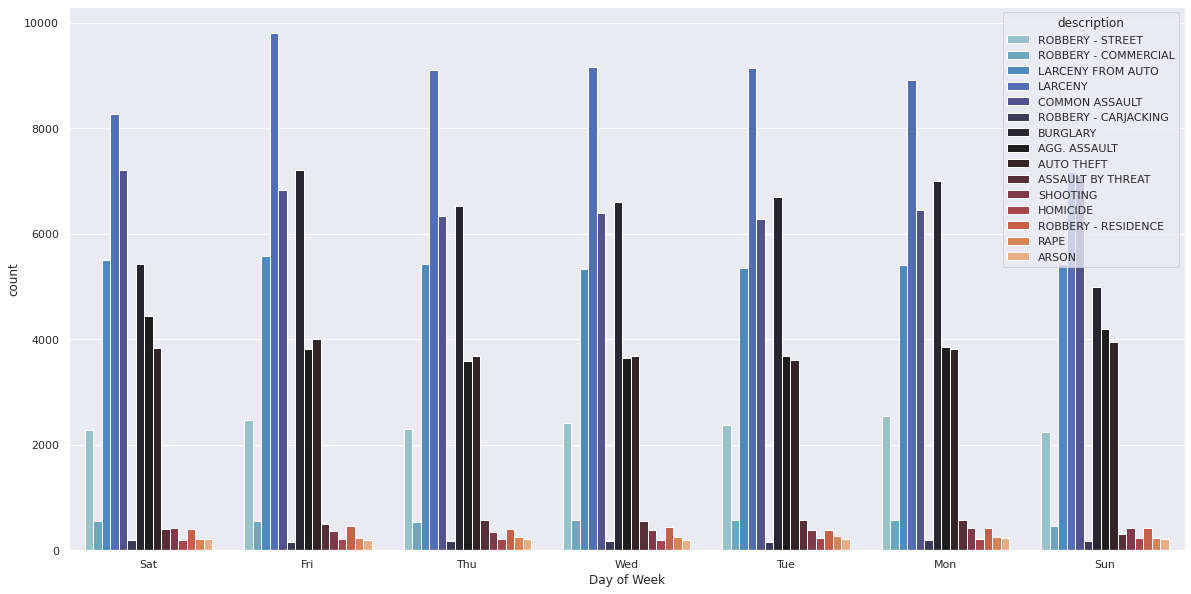

In [11]:
sns.set(rc={'figure.figsize': (20,10)})
sns.countplot(x = 'Day of Week', data = df, hue = 'description', palette= 'icefire')

<AxesSubplot:xlabel='Month', ylabel='count'>

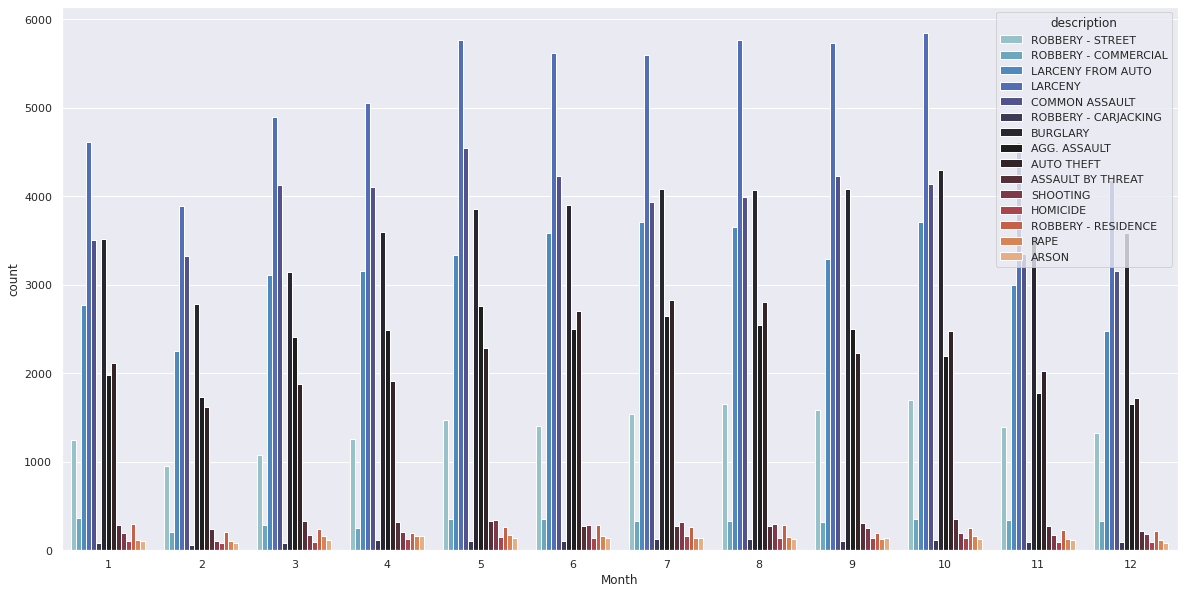

In [12]:
sns.set(rc={'figure.figsize': (20,10)})
sns.countplot(x = 'Month', data = df, hue = 'description', palette= 'icefire')

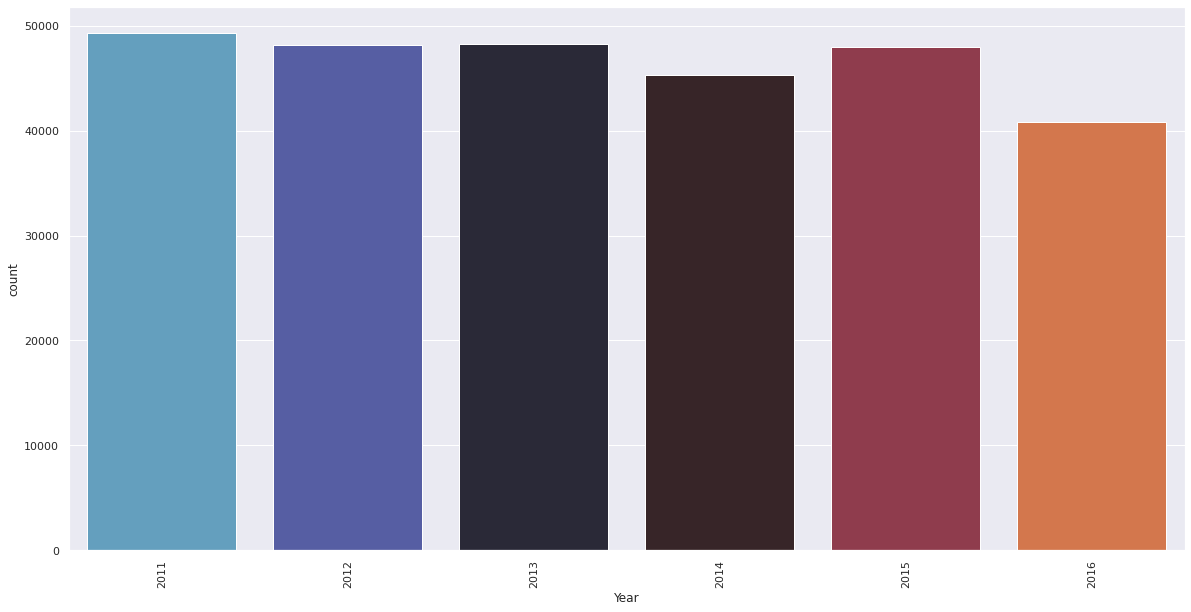

In [13]:
sns.set(rc={'figure.figsize': (20,10)})
sns.countplot(x = 'Year', data = df, palette= 'icefire')
plt.xticks(rotation = 90)
plt.show()

In [14]:
df['RowID'] = df.reset_index().index

In [15]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['RowID'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1714,1625,992,712,576,502,713,1239,1652,1584,...,2108,2602,2536,2555,2638,2296,2317,2271,2337,2237
Mon,1710,1495,1011,705,557,479,735,1283,1690,1571,...,1893,2386,2222,2539,2575,2339,2299,2155,2078,1941
Sat,2136,2147,1800,1128,844,645,604,596,945,1115,...,1813,2023,2145,2093,2286,2100,2036,2161,2288,2272
Sun,2062,2260,1931,1257,835,606,475,578,800,1008,...,1579,1960,1901,2014,2133,1978,2213,2163,2035,1830
Thu,1587,1482,913,677,523,523,681,1273,1679,1603,...,1913,2305,2302,2308,2377,2137,2200,2250,2031,1880


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

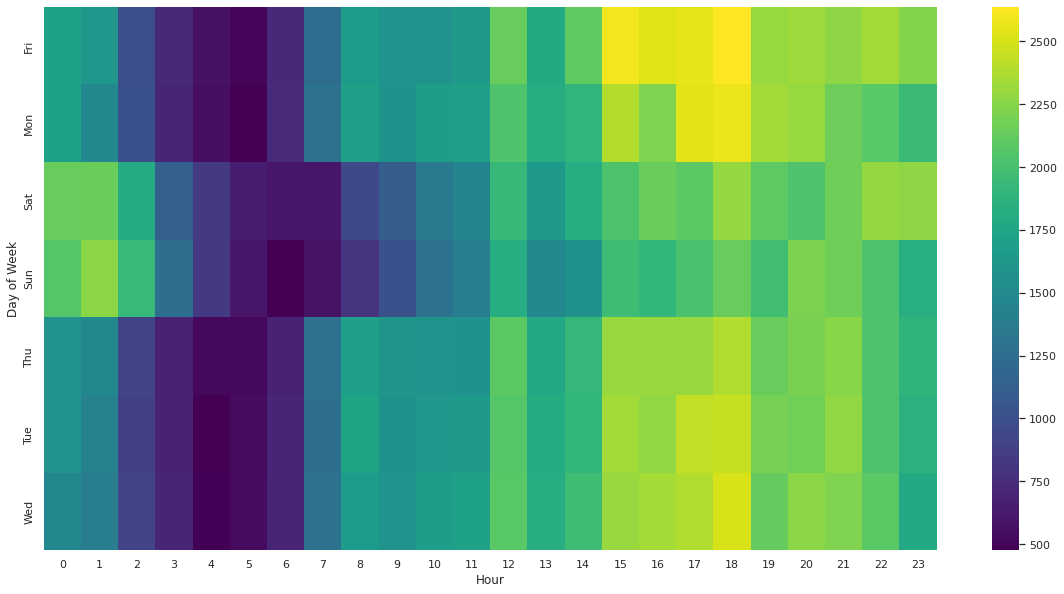

In [16]:
sns.heatmap(dayHour, cmap='viridis')


In [17]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['RowID'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,3343,2776,3415,3495,3976,3581,3875,4017,3835,3957,3280,2813
Mon,2979,2709,3060,3639,3630,3896,3676,3877,3645,3854,2929,2982
Sat,2977,2436,3253,3268,3428,3735,3602,3823,3572,3624,3073,2770
Sun,2902,2214,2806,2879,3390,3629,3820,3526,3571,3408,2873,2573
Thu,3182,2383,3231,3197,3875,3688,3534,3650,3562,3727,2902,2732


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

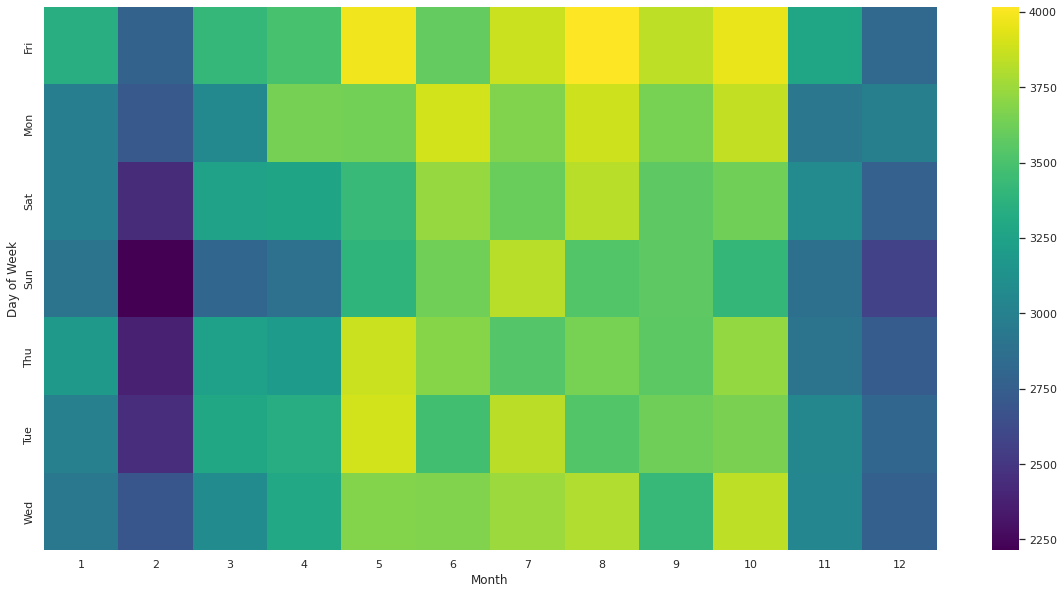

In [18]:
sns.heatmap(dayMonth, cmap='viridis')


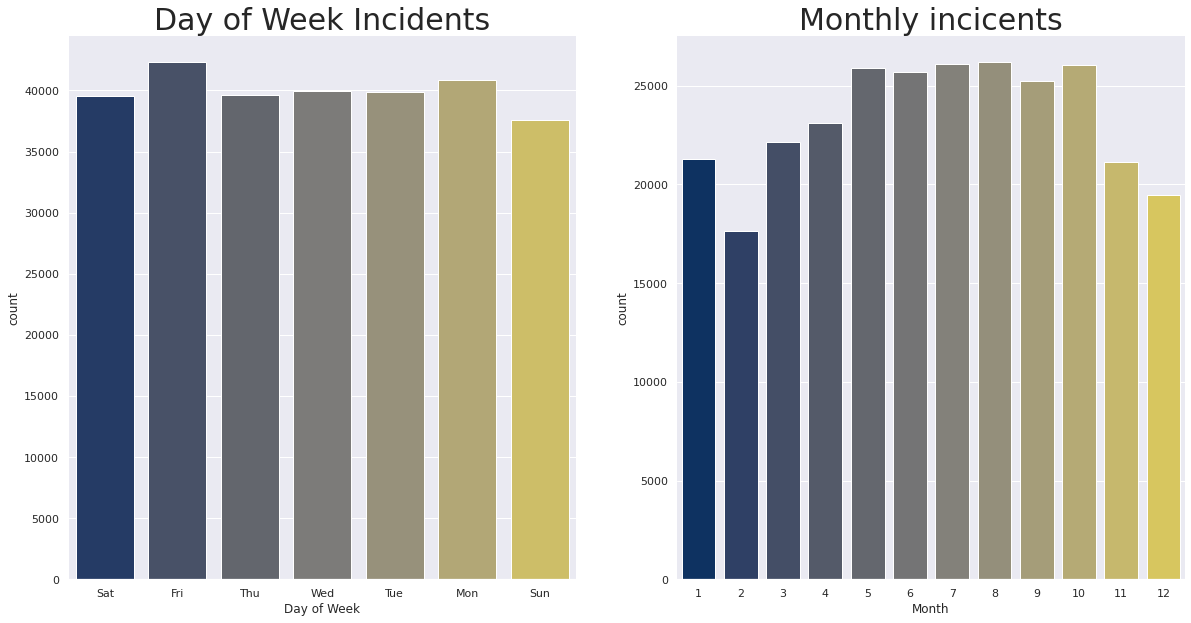

In [19]:
fig, axes = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x = 'Day of Week', data = df, palette = 'cividis', ax = axes[0])
axes[0].set_title('Day of Week Incidents', size = 30)

sns.countplot(x='Month', data = df, palette ='cividis', ax = axes[1])
axes[1].set_title('Monthly incicents', size = 30)
sns.despine(bottom= False, left = True)

# Spatial Analysis


In [20]:
df['Day of Week'].value_counts()\
                .head(20)\
                .to_frame(name = 'Count')\
                .reset_index()\
                .style.background_gradient(cmap='Set3', subset = 'Count')

,index,Count
0,Fri,42363
1,Mon,40876
2,Wed,39971
3,Tue,39911
4,Thu,39663
5,Sat,39561
6,Sun,37591


In [21]:
df['Month'].value_counts()\
            .head(15)\
            .to_frame(name = 'Count')\
            .reset_index()\
            .style.background_gradient(cmap='Set3', subset='Count')

,index,Count
0,8,26216
1,7,26085
2,10,26065
3,5,25874
4,6,25680
5,9,25228
6,4,23110
7,3,22135
8,1,21306
9,11,21148


In [22]:
df['Hour'].value_counts()\
            .head(25)\
            .to_frame(name = 'Count')\
            .reset_index()\
            .style.background_gradient(cmap='Set3', subset='Count')

,index,Count
0,18,16960
1,17,16321
2,15,15917
3,16,15733
4,21,15506
5,20,15491
6,19,15165
7,22,14892
8,12,14135
9,23,13795


In [23]:
df['Year'].value_counts()\
            .head(25)\
            .to_frame(name = 'Count')\
            .reset_index()\
            .style.background_gradient(cmap='Set3', subset='Count')

,index,Count
0,2011,49350
1,2013,48287
2,2012,48156
3,2015,47997
4,2014,45291
5,2016,40855


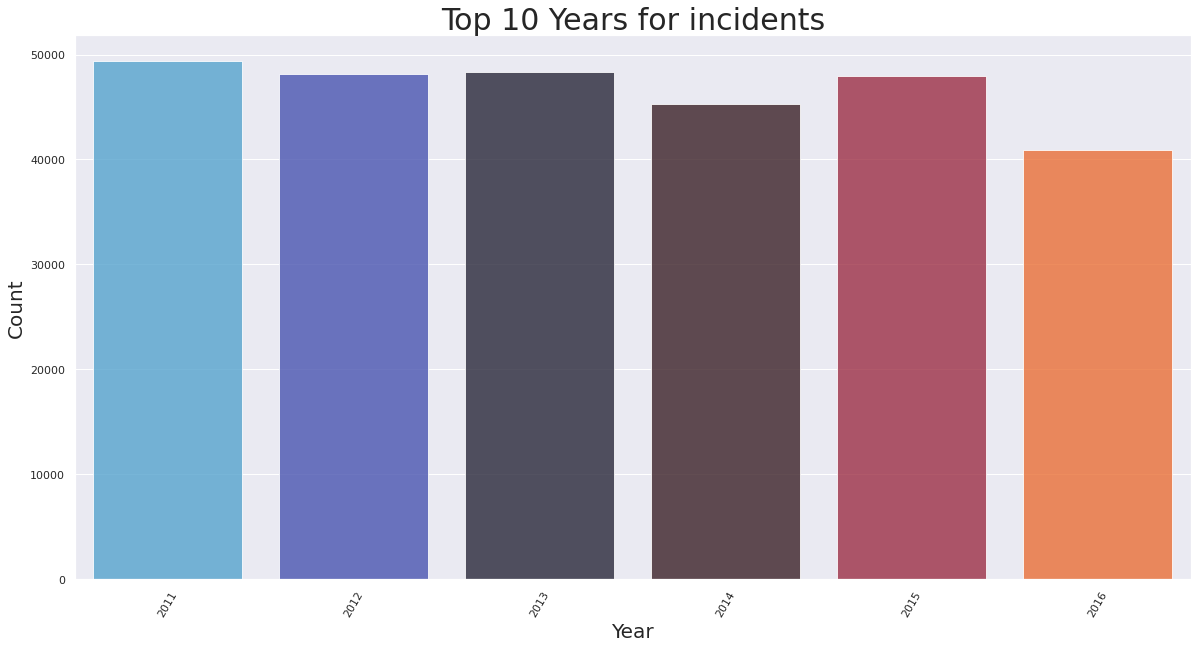

In [24]:
year_count = df['Year'].value_counts()
year_count = year_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(x= year_count.index, y = year_count.values, alpha = 0.8, saturation =1, palette='icefire')
plt.title('Top 10 Years for incidents', fontsize = 30)
plt.xlabel('Year', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 60)
plt.show()

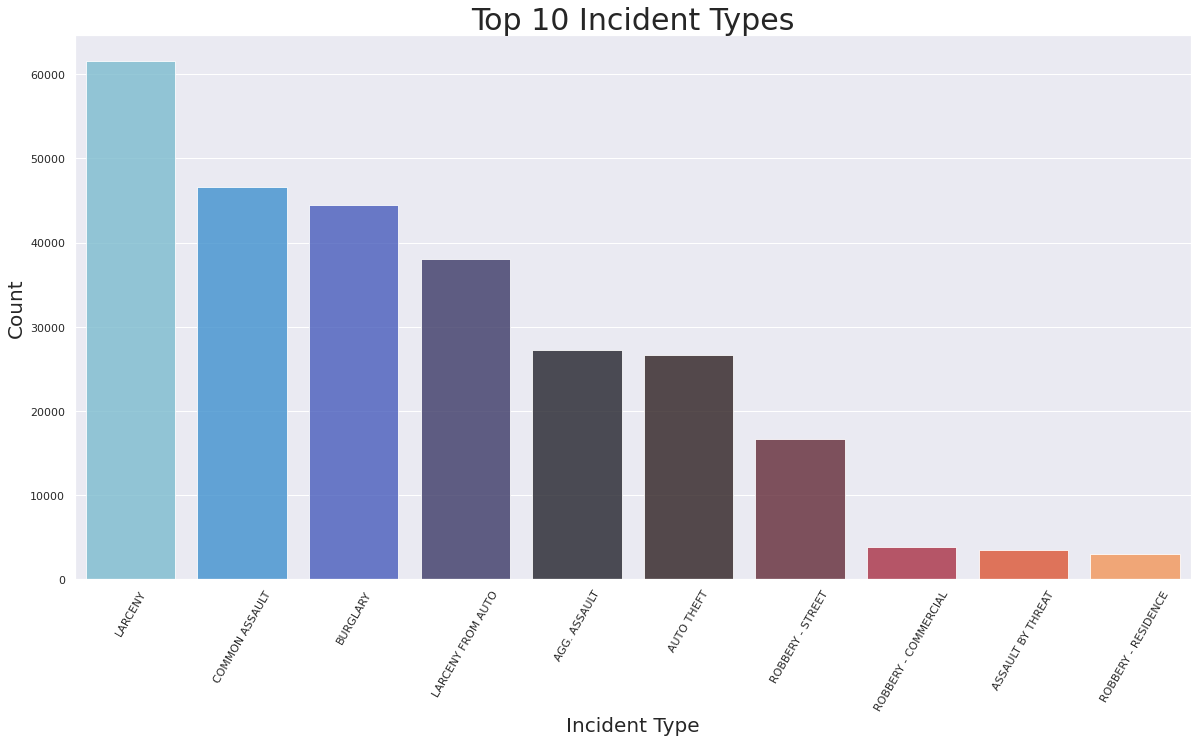

In [25]:
inci_count = df['description'].value_counts()
inci_count = inci_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(x= inci_count.index, y = inci_count.values, alpha = 0.8, saturation =1, palette='icefire')
plt.title('Top 10 Incident Types', fontsize = 30)
plt.xlabel('Incident Type', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 60)
plt.show()

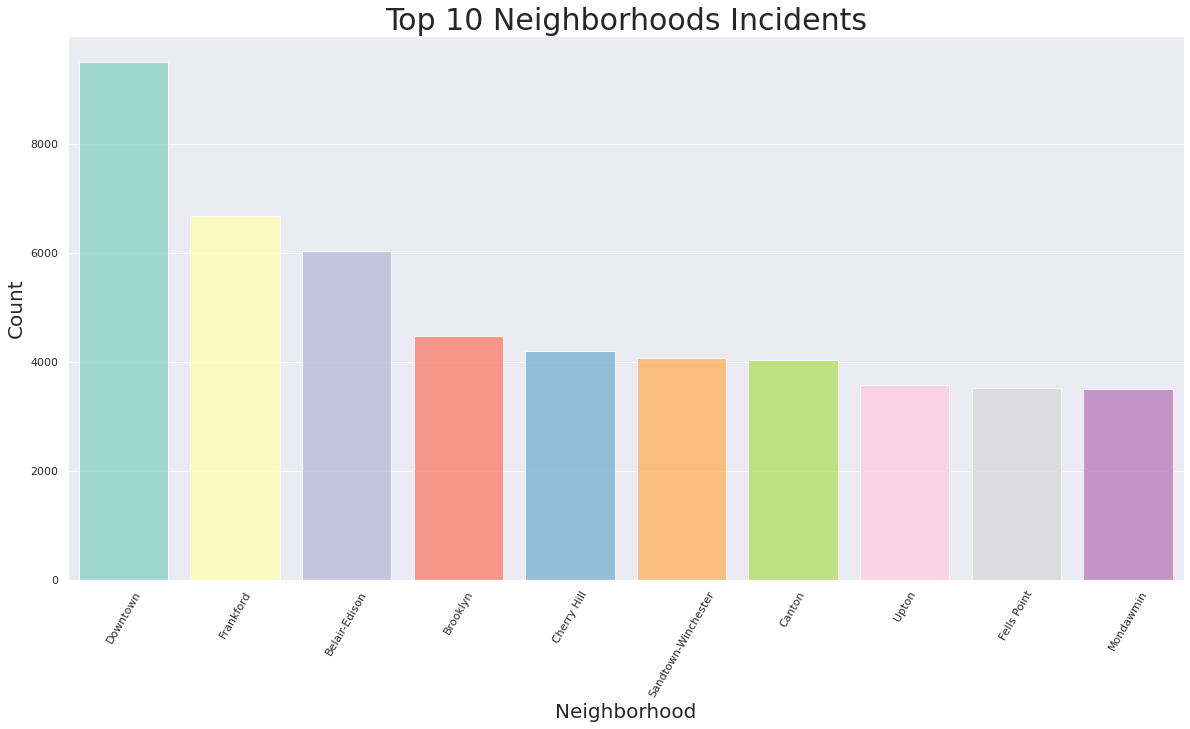

In [26]:
city_count = df['neighborhood'].value_counts()
city_count = city_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(x=city_count.index, y= city_count.values, alpha = 0.8, saturation = 1, palette = 'Set3')
plt.title('Top 10 Neighborhoods Incidents', fontsize = 30)
plt.xlabel('Neighborhood', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 60)
plt.show()

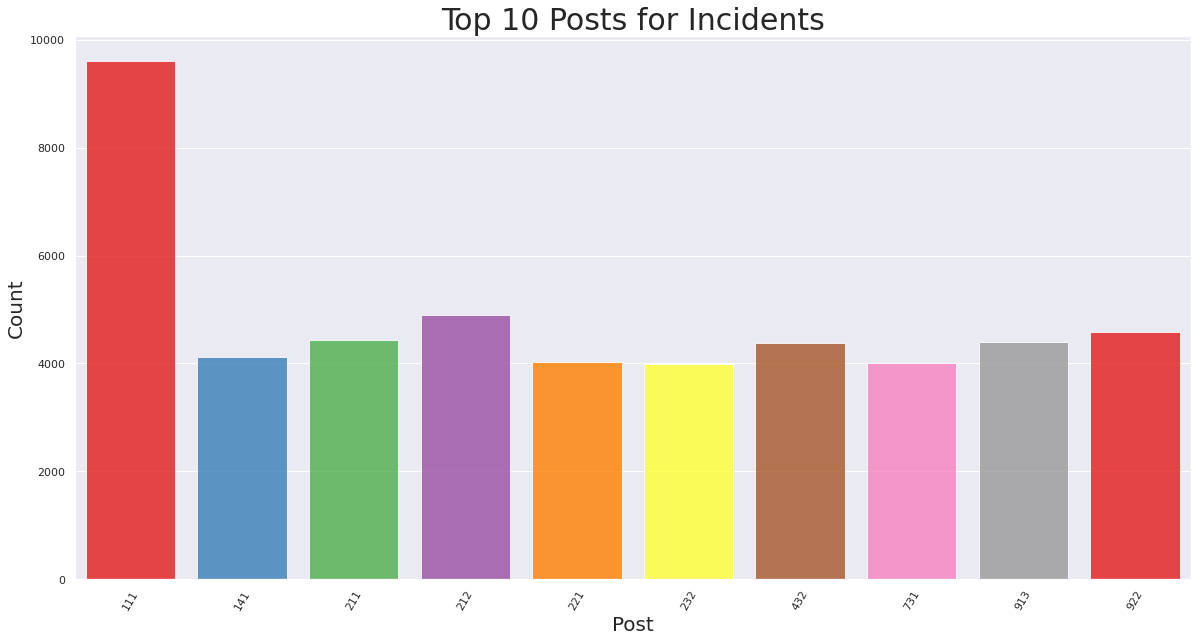

In [27]:
post_count = df['post'].value_counts()
post_count = post_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(x=post_count.index, y= post_count.values, alpha = 0.8, saturation = 1, palette = 'Set1')
plt.title('Top 10 Posts for Incidents', fontsize = 30)
plt.xlabel('Post', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 60)
plt.show()

In [28]:
df['weapon'].value_counts()\
            .head(10)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='cividis', subset='Count')

,index,Count
0,Unknown,184877
1,HANDS,50364
2,FIREARM,20846
3,OTHER,14077
4,KNIFE,9772


## Weapon Analysis

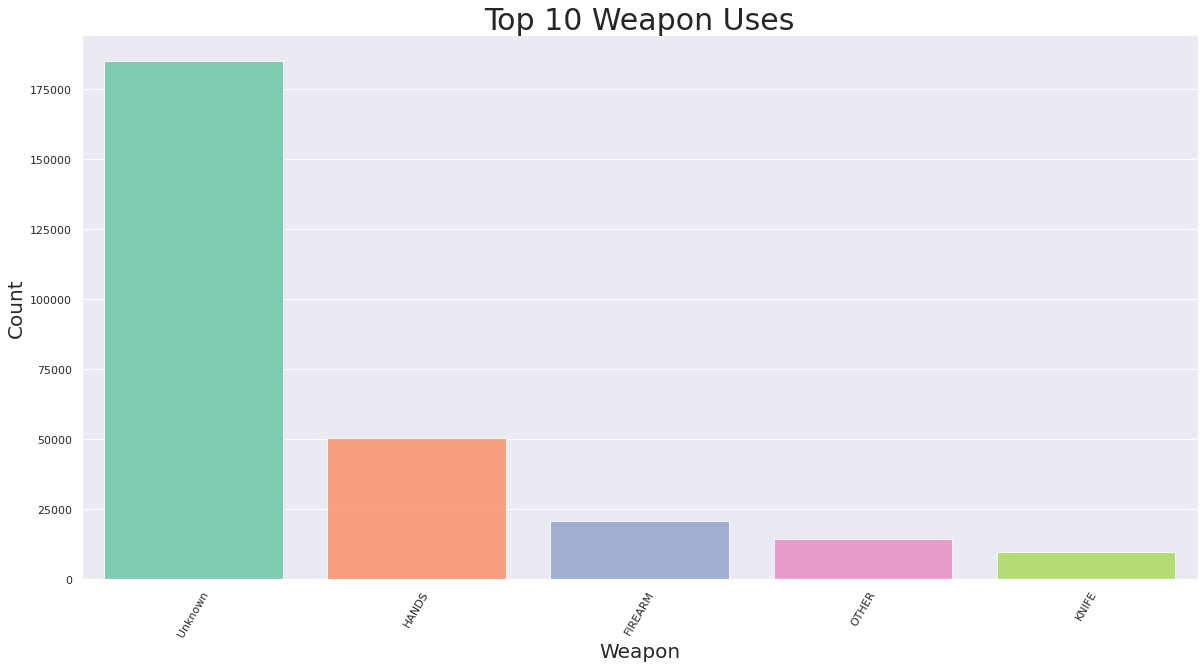

In [29]:
wep_count = df['weapon'].value_counts()
wep_count = wep_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(x=wep_count.index, y= wep_count.values, alpha = 0.8, saturation = 1, palette = 'Set2')
plt.title('Top 10 Weapon Uses', fontsize = 30)
plt.xlabel('Weapon', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 60)
plt.show()

# Firearm-Related Crimes

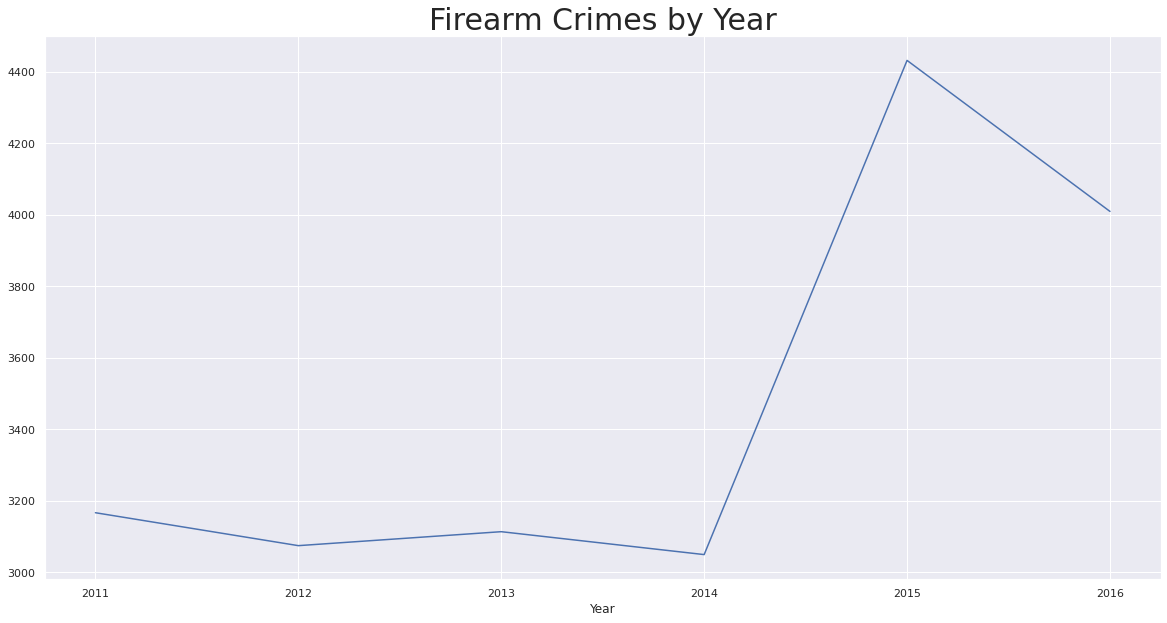

In [30]:
df[df['weapon']=='FIREARM'].groupby('Year').count()['RowID'].plot()
plt.title('Firearm Crimes by Year', fontsize = 30)
plt.show()

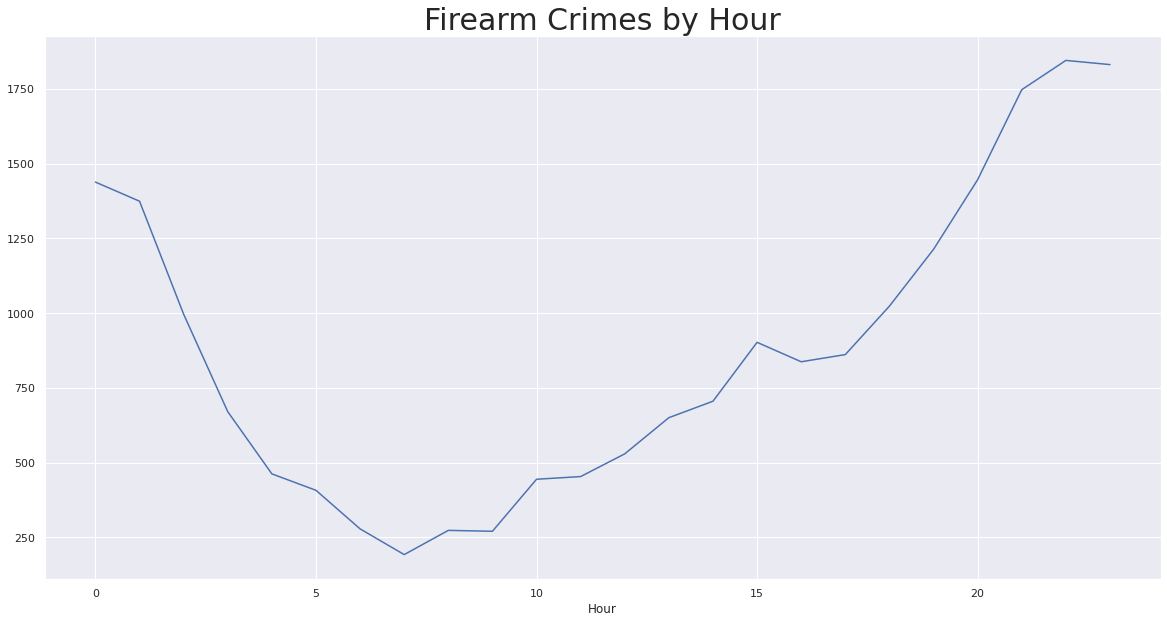

In [31]:
df[df['weapon']=='FIREARM'].groupby('Hour').count()['RowID'].plot()
plt.title('Firearm Crimes by Hour', fontsize = 30)
plt.show()

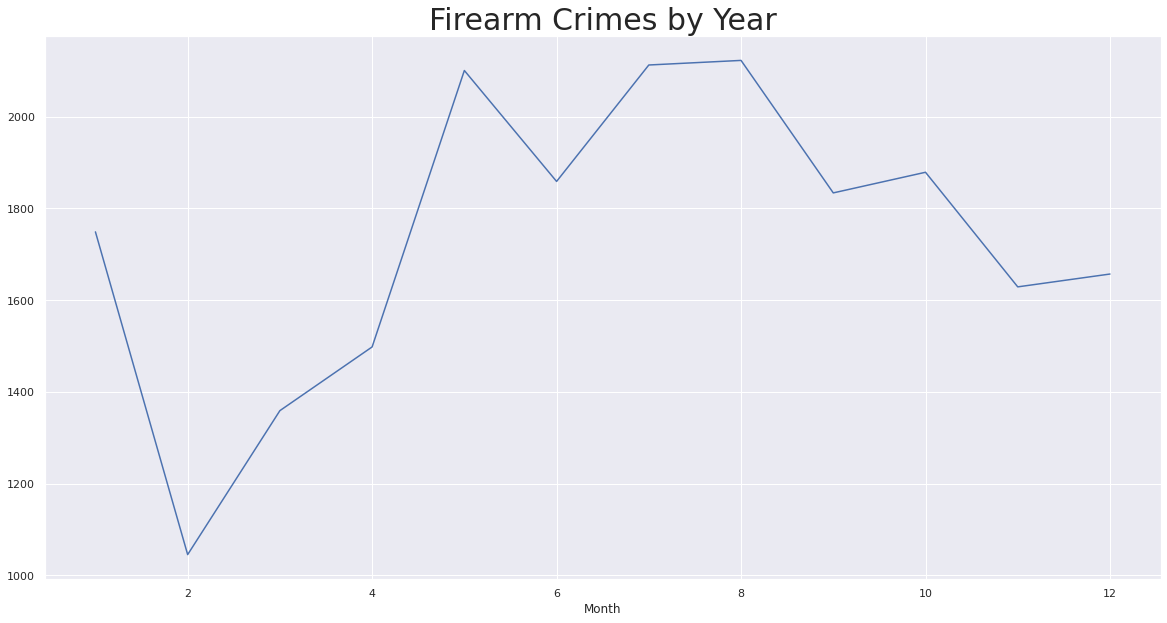

In [32]:
df[df['weapon']=='FIREARM'].groupby('Month').count()['RowID'].plot()
plt.title('Firearm Crimes by Year', fontsize = 30)
plt.show()